#HW1 - Data Exploration and Preparation

In [ ]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24 }
pylab.rcParams.update(params)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading the dataset

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
virus_dataset = pd.read_csv(filename, header=0)

##First Look

In [ ]:
virus_dataset.shape

(1250, 26)

In [ ]:
virus_dataset['conversations_per_day'].value_counts()

3     224
2     215
4     190
5     156
6     111
1     104
8      72
7      60
9      39
10     23
11     19
12     12
13      9
14      6
17      4
15      2
16      2
19      1
22      1
Name: conversations_per_day, dtype: int64

In [ ]:
virus_dataset['sport_activity'].value_counts()

1    481
0    360
2    241
3    111
4     29
5     28
Name: sport_activity, dtype: int64

In [ ]:
virus_dataset['happiness_score'].value_counts()

10    340
9     331
8     216
11    187
7     116
6      39
5      11
4       9
3       1
Name: happiness_score, dtype: int64

In [ ]:
virus_dataset.columns

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'symptoms',
       'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06',
       'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk'],
      dtype='object')

In [ ]:
virus_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1250 non-null   int64  
 1   age                    1250 non-null   int64  
 2   sex                    1250 non-null   object 
 3   weight                 1250 non-null   float64
 4   blood_type             1250 non-null   object 
 5   current_location       1250 non-null   object 
 6   num_of_siblings        1250 non-null   int64  
 7   happiness_score        1250 non-null   int64  
 8   household_income       1250 non-null   int64  
 9   conversations_per_day  1250 non-null   int64  
 10  sugar_levels           1250 non-null   int64  
 11  sport_activity         1250 non-null   int64  
 12  symptoms               766 non-null    object 
 13  pcr_date               1250 non-null   object 
 14  PCR_01                 1250 non-null   float64
 15  PCR_

##Partitioning the data


In [ ]:
#data = virus_dataset[virus_dataset.columns[:24]]
#targets = virus_dataset[virus_dataset.columns[-2:]]
#data_train, data_test, targets_train, targets_test= train_test_split(
#    data, targets, test_size=0.2, random_state=133)

data_train, data_test = train_test_split(
    virus_dataset, test_size=0.2, random_state=133)
data_train

,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
256,34,29,F,56.6,A+,"('22.75218', '72.68533')",2,9,2,3,...,91.991738,-5.700317,112.850913,19.022486,1.600888,8.105269,1.019798,0.799955,-1,-1
351,1246,48,F,69.6,O+,"('-7.54972', '110.71639')",0,8,2,7,...,-90.340184,-4.748222,204.938217,21.951817,3.442616,4.273379,0.905969,8.842312,1,1
348,810,28,M,80.9,AB+,"('11.93381', '79.82979')",1,9,1,13,...,-90.372167,-6.575695,151.530975,-14.272414,4.124909,5.127900,-2.789673,6.333419,1,1
109,725,16,M,54.3,A+,"('-26.22861', '-52.67056')",1,10,3,8,...,-51.014912,-10.508345,28.369077,11.987076,4.333476,5.161051,-8.534867,-6.303868,-1,-1
1093,861,10,M,30.6,O+,"('48.21644', '9.02596')",0,8,2,2,...,96.431075,-1.417134,285.079071,-8.209959,5.932142,2.562992,7.322826,-10.928784,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1619,11,F,33.2,O-,"('9.91861', '-68.30472')",1,9,6,4,...,-67.359936,-3.623306,126.624634,21.741693,1.246688,5.097238,4.108790,-2.334492,1,1
1025,1175,5,M,18.1,A+,"('-5.85746', '144.23058')",2,7,3,4,...,4.044351,-6.074163,100.481991,-26.935734,0.951585,0.658245,-2.707125,0.232490,-1,-1
1080,896,17,M,89.8,O+,"('-13.7804', '34.4587')",1,10,0,1,...,15.161088,-4.707515,74.738408,-6.986699,2.550524,2.414891,0.746937,-4.522514,-1,1
904,1852,52,M,61.8,O+,"('37.65181', '120.33063')",3,10,1,4,...,-52.612026,-3.842674,228.561174,-12.295060,2.202224,1.905380,3.927934,-11.242184,-1,-1


##Basic data exploration

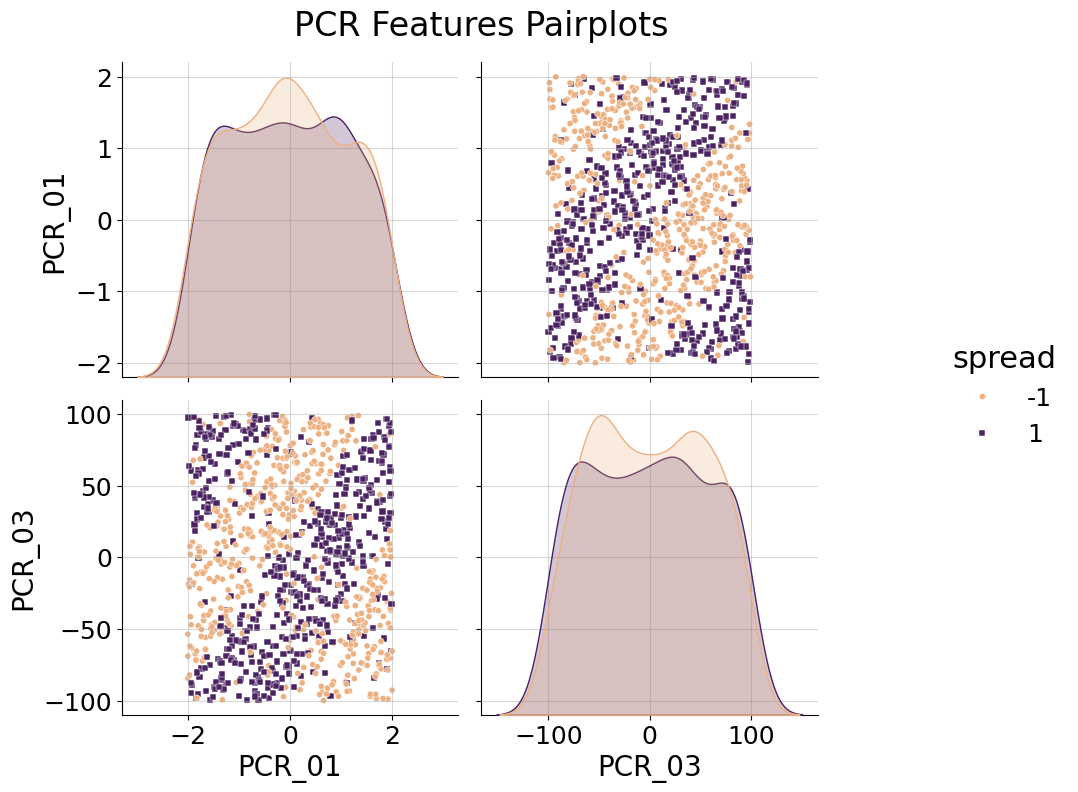

In [ ]:

g = sns.pairplot(data_train, hue="spread",
             vars = ['PCR_01', 'PCR_03'], markers=["o", "s"], palette = "flare",
             plot_kws={"s": 20})
g.fig.suptitle("PCR Features Pairplots", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [ ]:
X_PCR_01 = data_train['PCR_01']
X_PCR_03 = data_train['PCR_03']
Y_spread = data_train['spread']

print("Correlation is:{:.3f}".format(X_PCR_01.corr(Y_spread)))
print("Correlation is:{:.3f}".format(X_PCR_03.corr(Y_spread)))


Correlation is:0.006
Correlation is:-0.004


## K-NN implementaion

In [ ]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial import distance
import numpy as np
class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        return self

    def predict(self, x):
        # calculate distances between all examples to x.
        distances = distance.cdist(x, self.X_train, 'euclidean')
        # sort along last axis (row) and take the K nearest.
        k_NN_indices = np.argpartition(distances, self.n_neighbors, axis = 1)[:,:self.n_neighbors]
        k_NN_labels = self.y_train[k_NN_indices]
        # most frequent label
        majority_labels = np.sign(np.sum(k_NN_labels, axis=1))
        majority_labels[majority_labels == 0] = -1
        predictions = majority_labels
        return predictions

In [ ]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


In [ ]:

KNN_model_1 = kNN(1)
X_train = data_train[['PCR_01', 'PCR_03']]
y_train = data_train[['spread']]

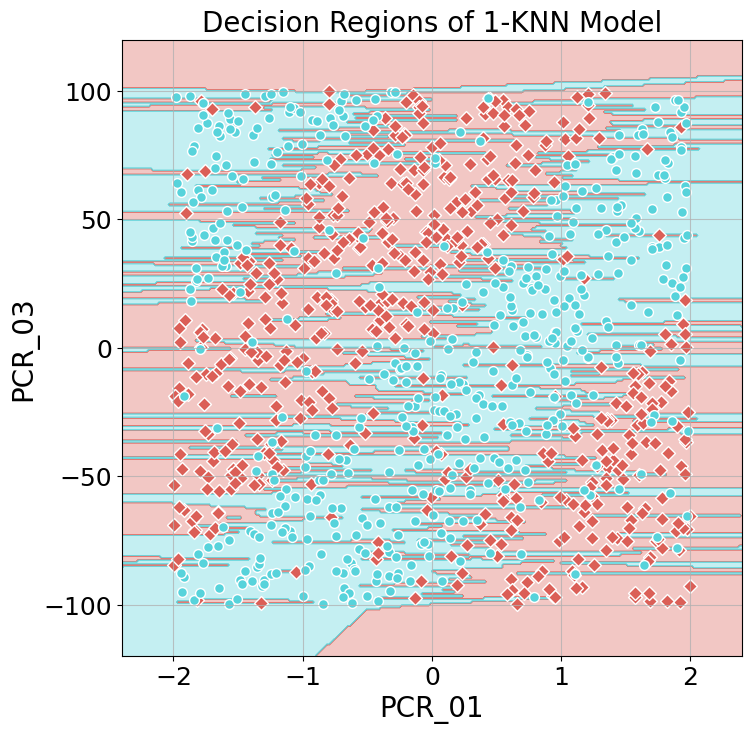

In [ ]:
KNN_model_1.fit(X_train, y_train)
title = 'Decision Regions of 1-KNN Model'
xlabel = 'PCR_01'
ylabel = 'PCR_03'

visualize_clf(KNN_model_1, X_train, y_train, title, xlabel, ylabel)

In [ ]:
X_test = data_test[['PCR_01', 'PCR_03']]
y_test = data_test["spread"]

# Calculate training accuracy and test accuracy
training_accuracy = KNN_model_1.score(X_train, y_train)
test_accuracy = KNN_model_1.score(X_test, y_test)

print("Training Accuracy:" ,training_accuracy)
print("Test Accuracy:",test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.664


##Data Normalization


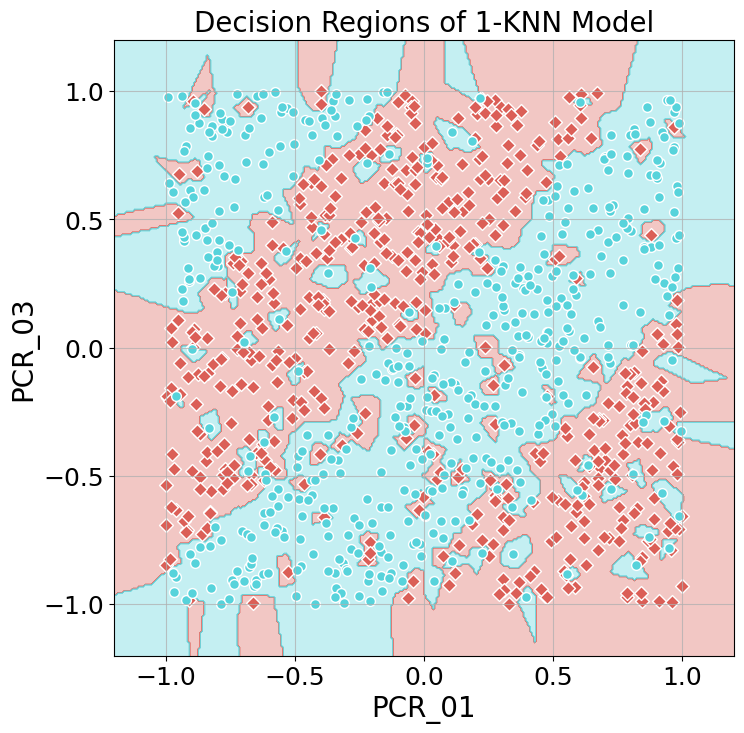

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

# train new 1-KNN with normelized dataset
KNN_model_1_normalized = kNN(1)
KNN_model_1_normalized.fit(X_train_normalized, y_train)

visualize_clf(KNN_model_1_normalized, X_train_normalized, y_train, title, xlabel, ylabel)

In [ ]:
# Calculate training accuracy and test accuracy
training_accuracy_normalized_data = KNN_model_1_normalized.score(X_train_normalized, y_train)
test_accuracy_normalized_data = KNN_model_1_normalized.score(X_test_normalized, y_test)

print("Training Accuracy:", training_accuracy_normalized_data)
print("Test Accuracy:",test_accuracy_normalized_data)

Training Accuracy: 1.0
Test Accuracy: 0.8


In [ ]:
X_train.describe()

,PCR_01,PCR_03
count,1000.000000,1000.000000
mean,-0.012807,0.181027
std,1.150072,57.611963
min,-1.998610,-99.874686
25%,-0.975463,-49.546848
50%,-0.032165,0.340271
75%,0.954856,48.518414
max,1.998911,99.821939


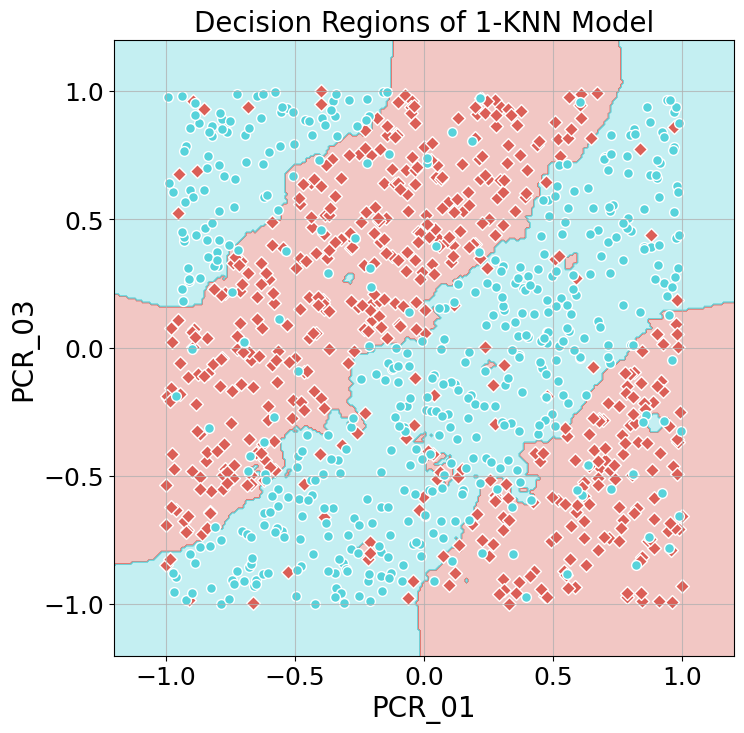

In [ ]:
# train new 5-KNN with normelized dataset
KNN_model_5_normalized = kNN(5)
KNN_model_5_normalized.fit(X_train_normalized, y_train)

visualize_clf(KNN_model_5_normalized, X_train_normalized, y_train, title, xlabel, ylabel)

In [ ]:
# Calculate training accuracy and test accuracy
training_accuracy_normalized_data = KNN_model_5_normalized.score(X_train_normalized, y_train)
test_accuracy_normalized_data = KNN_model_5_normalized.score(X_test_normalized, y_test)

print("Training Accuracy:", training_accuracy_normalized_data)
print("Test Accuracy:",test_accuracy_normalized_data)

Training Accuracy: 0.879
Test Accuracy: 0.856


# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)